<a href="https://colab.research.google.com/github/shr3e23/HCAI5DS02_ShreekrishnaShrestha/blob/main/HCAI5DS02_ShreekrishnaShrestha_worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

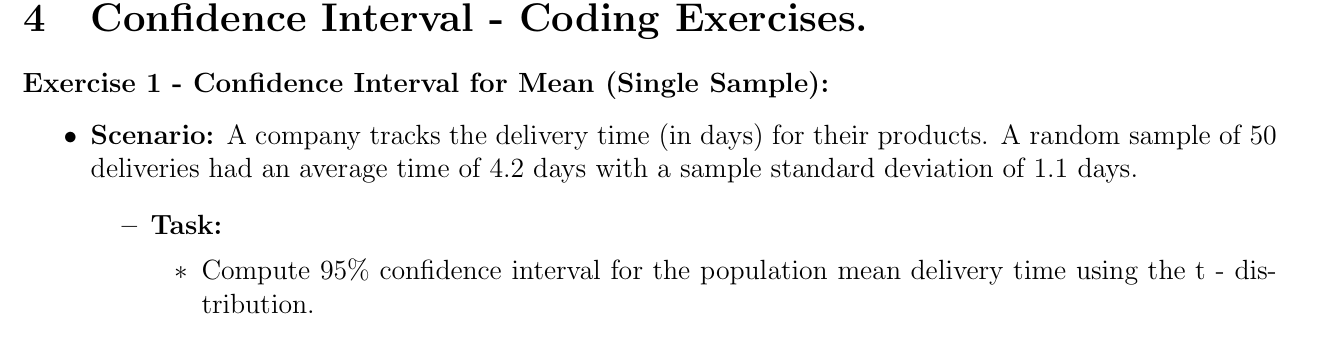

In [5]:
import scipy.stats as stats
import numpy as np

# Given data
n = 50
sample_mean = 4.2
sample_std = 1.1
confidence = 0.95

# Step 1: Standard Error
SE = sample_std / np.sqrt(n)
print("Standard Error", SE)

# Step 2: Critical t-value
df = n - 1
t_critical = stats.t.ppf(1 - (1 - confidence)/2, df)
print(f"Critical t value at condidence level 95% and degree of freedom {df} is {t_critical}")

# Step 3: Margin of Error
ME = t_critical * SE
print("Nargin of Error",ME)

# Step 4: Confidence Interval
CI_lower = sample_mean - ME
CI_upper = sample_mean + ME

print(f"95% CI: ({CI_lower:.2f}, {CI_upper:.2f})")


Standard Error 0.15556349186104046
Critical t value at condidence level 95% and degree of freedom 49 is 2.0095752371292397
Nargin of Error 0.31261654104530295
95% CI: (3.89, 4.51)


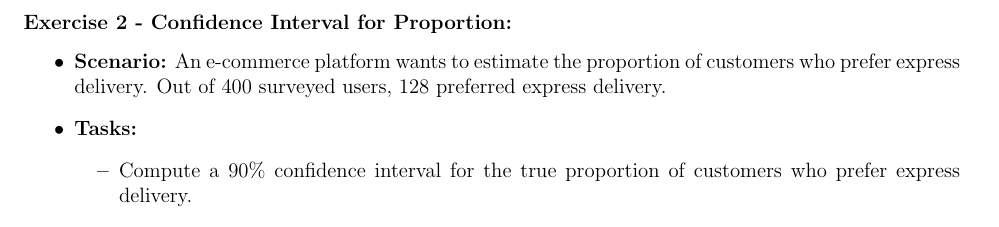

In [9]:
import scipy.stats as stats
import numpy as np

# Given data
n = 400
x = 128
confidence = 0.90

# Step 1: Sample proprtion
sample_prop = x / n
print("Sample Proportion", sample_prop)

# Step 2: Standard error
SE = np.sqrt((sample_prop * (1 - sample_prop)) / n)
print("Standard Error", SE)

# Step 3: Critical value at z distribution
z_critical = stats.norm.ppf(1 - (1 - confidence) / 2)
print(f"Critical t value at condidence level {confidence*100} is {z_critical}")

# Step 4: Confidence Interval
CI_lower = sample_prop - SE
CI_upper = sample_prop + SE

print(f"90% CI: ({CI_lower:.2f}, {CI_upper:.2f})")


Sample Proportion 0.32
Standard Error 0.0233238075793812
Critical t value at condidence level 90.0 is 1.6448536269514722
90% CI: (0.30, 0.34)


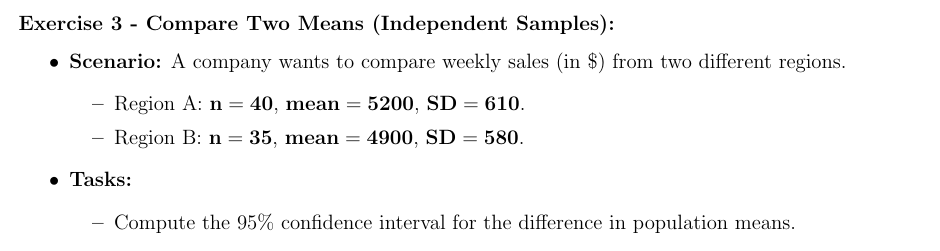

In [15]:
import scipy.stats as stats
import numpy as np

# Given data
n1, mean1, std1 = 40, 5200, 610
n2, mean2, std2 = 35, 4900, 580
confidence = 0.95

# Step 1: Standard error
SE = np.sqrt((std1**2 / n1) + (std2**2 / n2))
print("Standard Error", SE)

# Step 2: Degrees of freedom (Welch's approximation)
numerator = (std1**2 / n1 + std2**2 / n2)**2
denominator = ((std1**2 / n1)**2 / (n1 - 1)) + ((std2**2 / n2)**2 / (n2 - 1))
df = numerator / denominator
print("Degrees of freedom", df)

# Step 3: Critical t-value
t_critical = stats.t.ppf(1 - (1 - confidence)/2, df)
print(f"Critical t value at condidence level 95% and degree of freedom {df} is {t_critical}")

# Step 4: Margin of error and CI
mean_diff = mean1 - mean2
ME = t_critical * SE
CI_lower = mean_diff - ME
CI_upper = mean_diff + ME

print(f"95% CI for difference in means: (${CI_lower:.2f}, ${CI_upper:.2f})")


Standard Error 137.52791924343424
Degrees of freedom 72.47603755653496
Critical t value at condidence level 95% and degree of freedom 72.47603755653496 is 1.993239891612047
95% CI for difference in means: ($25.87, $574.13)


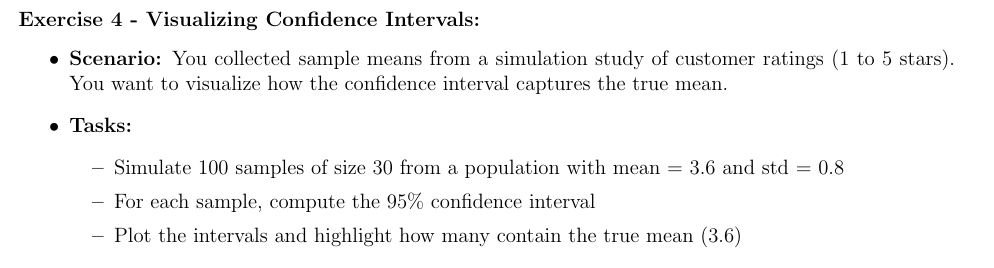

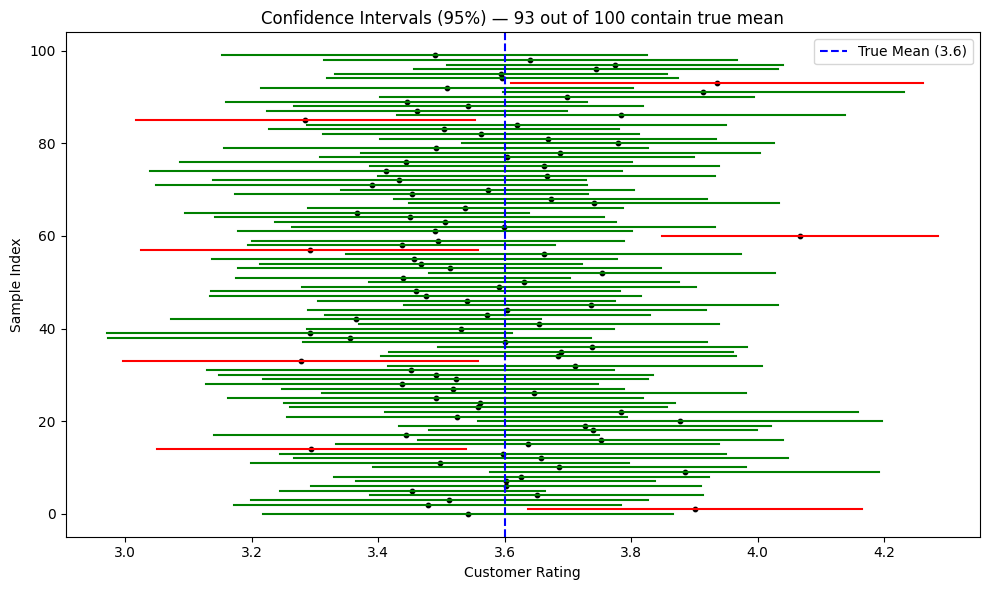

In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
true_mean = 3.6
true_std = 0.8
sample_size = 30
num_samples = 100
confidence = 0.95

# Storage
intervals = []
contains_true_mean = []

# Simulation
for _ in range(num_samples):
    sample = np.random.normal(loc=true_mean, scale=true_std, size=sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    SE = sample_std / np.sqrt(sample_size)
    t_crit = stats.t.ppf(1 - (1 - confidence)/2, df=sample_size - 1)
    ME = t_crit * SE
    lower = sample_mean - ME
    upper = sample_mean + ME
    intervals.append((lower, upper))
    contains_true_mean.append(lower <= true_mean <= upper)

# Plotting
plt.figure(figsize=(10, 6))
for i, (ci, contains) in enumerate(zip(intervals, contains_true_mean)):
    color = 'green' if contains else 'red'
    plt.plot([ci[0], ci[1]], [i, i], color=color)
    plt.scatter(np.mean(ci), i, color='black', s=10)

plt.axvline(true_mean, color='blue', linestyle='--', label='True Mean (3.6)')
plt.title(f"Confidence Intervals (95%) — {sum(contains_true_mean)} out of {num_samples} contain true mean")
plt.xlabel("Customer Rating")
plt.ylabel("Sample Index")
plt.legend()
plt.tight_layout()
plt.show()
